# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [110]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [111]:
import requests
from matplotlib import pyplot as plt
import pandas as pd
from api_keys import weather_api_key
import json
import numpy as np
import csv
from datetime import datetime
from citipy import citipy
import scipy.stats as st

#needing a csv file to output results into
output_file='../output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [112]:
#lets try the citipy starter code
# List for holding lat_lngs and cities
lat_lngs = []
cities_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it our cities list
    if city not in cities_list:
        cities_list.append(city)

# Print the city count to confirm sufficient count
len(cities_list)


635

In [113]:
# Output list of cities to csv
cities = {"City": cities_list}
cities_df = pd.DataFrame(cities)
cities_df.to_csv("../output_data/cities.csv", encoding="utf-8", index=False)
cities_df.head()

,City
0,jamestown
1,mitsamiouli
2,cape town
3,kattivakkam
4,hasaki


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [114]:
# Specify the URL, and change temperatures from defaults to imperial
measure='Imperial'
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f'{url}appid={weather_api_key}&units={measure}&q='

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=b3e5a5944390d416dfc2560eea2dd07a&units=Imperial&q=


In [115]:
# Loop through the list of cities .. Perform a weather check on each city using a series of successive API calls.
#set up fields to capture information:
city_name = []
city_id=[]
lat=[]
lon=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
w_date=[]

for city in cities_list:
    try:
        response=requests.get(query_url + city).json()
    
# Get fields from JSON response

        cityid = response['id']
        city_id.append(cityid)
        city_name.append(city)
      
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country']) 
        w_date.append(response['dt'])  
     
        print(f" processing record for {city}, City ID of {cityid}")
    except:
        print(f" {city}, no weather record")    

           
    

 processing record for jamestown, City ID of 5122534
 processing record for mitsamiouli, City ID of 921786
 processing record for cape town, City ID of 3369157
 processing record for kattivakkam, City ID of 1267433
 processing record for hasaki, City ID of 2112802
 processing record for karratha, City ID of 6620339
 processing record for chuy, City ID of 3443061
 processing record for abashiri, City ID of 2130741
 processing record for wawa, City ID of 2319078
 processing record for atuona, City ID of 4020109
 processing record for puro, City ID of 1692364
 processing record for rikitea, City ID of 4030556
 taolanaro, no weather record
 amderma, no weather record
 processing record for sept-iles, City ID of 6144312
 processing record for carutapera, City ID of 3402648
 processing record for ushuaia, City ID of 3833367
 processing record for milos, City ID of 256952
 processing record for puerto ayora, City ID of 3652764
 processing record for nikolskoye, City ID of 546105
 illoqqortoor

 processing record for beloha, City ID of 1067565
 processing record for omsukchan, City ID of 2122493
 processing record for husavik, City ID of 2629833
 processing record for vestmannaeyjar, City ID of 3412093
 processing record for college, City ID of 5859699
 processing record for cullman, City ID of 4057835
 processing record for thompson, City ID of 6165406
 processing record for katangli, City ID of 2122783
 processing record for kuito, City ID of 3348078
 processing record for vostok, City ID of 2013279
 processing record for los llanos de aridane, City ID of 2514651
 processing record for zhigansk, City ID of 2012530
 processing record for avarua, City ID of 4035715
 rungata, no weather record
 processing record for ouallam, City ID of 2440371
 processing record for lingao, City ID of 1803560
 processing record for bhaderwah, City ID of 1276358
 processing record for pemangkat, City ID of 1631637
 processing record for lembeni, City ID of 156025
 katsiveli, no weather record
 

 processing record for lata, City ID of 2738381
 processing record for grong, City ID of 3154907
 processing record for hambantota, City ID of 1244926
 processing record for ilulissat, City ID of 3423146
 processing record for goundi, City ID of 2431736
 processing record for riyadh, City ID of 108410
 processing record for vila franca do campo, City ID of 3372472
 processing record for chau doc, City ID of 1585660
 processing record for bac lieu, City ID of 1591474
 processing record for ahipara, City ID of 2194098
 processing record for batagay-alyta, City ID of 2027042
 processing record for san patricio, City ID of 4726521
 processing record for kuryk, City ID of 609919
 processing record for anamur, City ID of 323828
 processing record for henderson, City ID of 5505411
 processing record for noumea, City ID of 2139521
 vaitupu, no weather record
 processing record for olafsvik, City ID of 3414079
 processing record for almeirim, City ID of 3407903
 processing record for jumla, Cit

 processing record for goderich, City ID of 5962442
 processing record for tuatapere, City ID of 2180815
 processing record for cap malheureux, City ID of 934649
 processing record for disna, City ID of 629055
 processing record for hirara, City ID of 1862505
 processing record for novi becej, City ID of 787610
 processing record for palana, City ID of 2122262
 processing record for guarapari, City ID of 3461888
 processing record for sao borja, City ID of 3449340
 processing record for ingham, City ID of 4997130
 grand river south east, no weather record
 processing record for tual, City ID of 1623197
 processing record for puerto escondido, City ID of 3520994
 processing record for surt, City ID of 2210554
 processing record for bonavista, City ID of 5905393
 processing record for lae, City ID of 2092740
 processing record for muana, City ID of 3394326
 processing record for alibag, City ID of 1279027
 processing record for ipora, City ID of 3461090
 processing record for shache, Cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [116]:
# convert dates from UNIX
converted_date=[]
for time_date in w_date:
    converted_date.append(datetime.fromtimestamp(int(time_date)).strftime('%d/%m/%Y'))
converted_date[0:5]

['10/01/2021', '10/01/2021', '10/01/2021', '10/01/2021', '10/01/2021']

In [117]:
# dictionary of lists  

dict = {'City Name': city_name, 'City ID': city_id, 'Lat': lat, 'Lon': lon, 'Max Temp': max_temp, 'Humidity': humidity, 'Cloudiness': cloudiness, 'Wind speed': wind_speed, 'Country': country, 'Date':converted_date}  
    
weather_results = pd.DataFrame(dict) 

#output data to csv
weather_results.to_csv("../Output_Data/weather_output.csv", encoding="utf-8", index=False)
weather_results.head()


,City Name,City ID,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind speed,Country,Date
0,jamestown,5122534,42.0970,-79.2353,26.01,86,1,4.61,US,10/01/2021
1,mitsamiouli,921786,-11.3847,43.2844,83.28,76,81,15.90,KM,10/01/2021
2,cape town,3369157,-33.9258,18.4232,70.00,68,20,20.71,ZA,10/01/2021
3,kattivakkam,1267433,13.2167,80.3167,86.00,74,75,8.05,IN,10/01/2021
4,hasaki,2112802,35.7333,140.8333,46.00,28,20,6.91,JP,10/01/2021


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [118]:
# any cities with high humidity  ie: > 100%
print(weather_results.loc[weather_results['Humidity']>100])


Empty DataFrame
Columns: [City Name, City ID, Lat, Lon, Max Temp, Humidity, Cloudiness, Wind speed, Country, Date]
Index: []


In [119]:
#  Get the indices of cities that have humidity over 100%.
## I ran this over a period of a week and at no stage did I get a single city exceeding 100% humidity




In [120]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

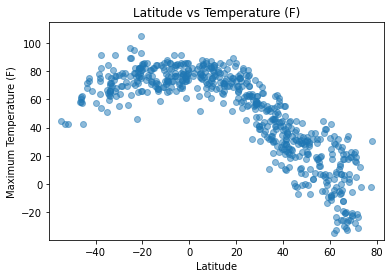

In [121]:
# Create a scatter plot which compares Lattitude to Temperature
# Create a scatter plot which compares Lattitude to Temperature
x_values = weather_results['Lat']
y_values = weather_results['Max Temp']
plt.scatter(x_values,y_values, alpha=0.50)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title('Latitude vs Temperature (F)')
plt.ylim(min(y_values)-5,max(y_values)+10)
plt.xlim(min(x_values)-5,max(x_values)+5)
plt.show()

In [122]:
#This plot looks at a sample of randomly selected cities, 
#comparing the cities latitude with the reported temperature, recorded on a particular day(10th January 2021):
##    there is a strong relationship between latitude and temperature, 
##    the higher the latitude, the lower the maximum temperature

## Latitude vs. Humidity Plot

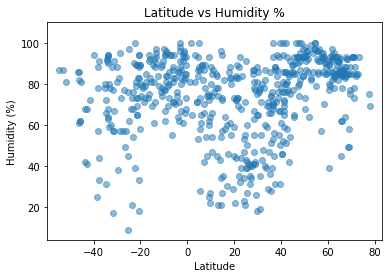

In [123]:
# Create a scatter plot which compares Latitude to Humidity
x_values = weather_results['Lat']
y_values = weather_results['Humidity']
plt.scatter(x_values,y_values, alpha=0.50)
plt.title('Latitude vs Humidity %')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(min(y_values)-5,max(y_values)+10)
plt.xlim(min(x_values)-5,max(x_values)+5)
plt.show()

In [124]:
#This plot looks at a sample of randomly selected cities, 
#comparing the cities latitude with the reported humidity % as recorded on a particular day (10th January 2021):
##     There is no direct relationship between the latitude of a city and the humidity, however:
##     ..Most cities reported humdity above 40%
##     ..Extremes of latitude were more likely to produce higher humidity (latitude below-40, and above 40)

## Latitude vs. Cloudiness Plot

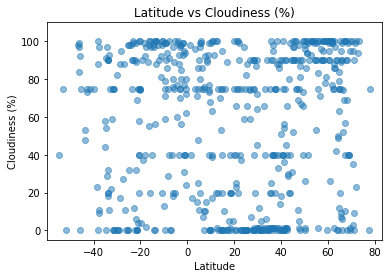

In [125]:
# Create a scatter plot which compares Lattitude to Cloudiness
x_values=weather_results['Lat']
y_values = weather_results['Cloudiness']
plt.scatter(x_values,y_values, alpha=0.50)
plt.title('Latitude vs Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(min(y_values)-5,max(y_values)+10)
plt.xlim(min(x_values)-5,max(x_values)+5)
plt.show()

In [126]:
#This plot looks at a sample of randomly selected cities, 
#comparing the cities latitude with the cloudiness % as recorded on a particular day (10th January 2021):
##     The majority of cities sit on either end of the extremes, 100% cloudiness or zero cloudiness
##     There is no relationship between the latitude and the percentage of cloudiness a city may experience


## Latitude vs. Wind Speed Plot

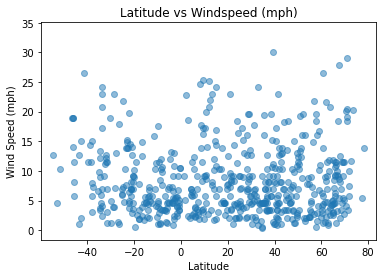

In [127]:
# Create a scatter plot which compares Lattitude to Windspeed
x_values=weather_results['Lat']
y_values = weather_results['Wind speed']
plt.scatter(x_values,y_values, alpha=0.50)
plt.title('Latitude vs Windspeed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(min(y_values)-2,max(y_values)+5)
plt.xlim(min(x_values)-5,max(x_values)+5)
plt.show()

In [128]:
#This plot looks at a sample of randomly selected cities, 
#comparing the cities latitude with the windspeed on a particular day (10th January 2021):
##     Latitude alone does not necessarily predict the windspeeed in a city
##     the majority of cities recorded a wind speed of 12mph or less

## Linear Regression

In [129]:
northern_result = weather_results.loc[pd.to_numeric(weather_results["Lat"]).astype(float) >0, :]
southern_result = weather_results.loc[pd.to_numeric(weather_results["Lat"]).astype(float) < 0, :]
type(northern_result)

pandas.core.frame.DataFrame

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

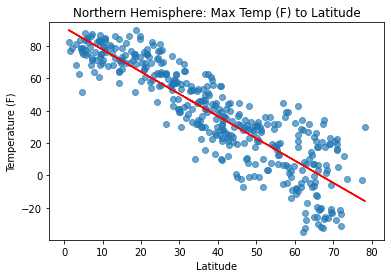

In [130]:
## Linear Regression model between Max Temp and Latitude

nh_temp = northern_result.iloc[:,4]
nh_lat = northern_result.iloc[:,2]

nh_slope, nh_int, nh_r, nh_p, nh_std_err = st.linregress(nh_lat, nh_temp)

# linear regression
nh_fit = nh_slope * nh_lat + nh_int

x_values = northern_result["Lat"]
y_values = northern_result["Max Temp"]

### # Plot the linear model 
plt.scatter(nh_lat,nh_temp, alpha=.65)
plt.plot(nh_lat,nh_fit,'r-')
plt.xlim(min(nh_lat)-5,max(nh_lat)+5)
plt.ylim(min(nh_temp)-5,max(nh_temp)+5)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Northern Hemisphere: Max Temp (F) to Latitude')
plt.show()

In [131]:
#This plot looks at a sample of randomly selected cities in the Northern Hemisphere, 
#comparing the cities latitude with the reported temperature, recorded on a particular day (10th January 2021):
##  there is a very strong relationship between the latitude of a city and the temperaure.  
##  The closer a city is to a zero latitude, the higher the temperature

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

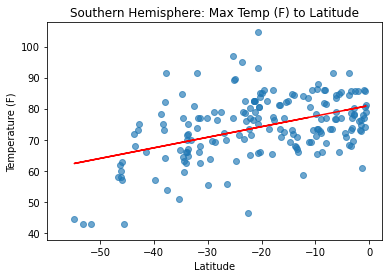

In [132]:
## Linear Regression model between Max Temp and Latitude

sh_temp = southern_result.iloc[:,4]
sh_lat = southern_result.iloc[:,2]

sh_slope, sh_int, sh_r, sh_p, sh_std_err = st.linregress(sh_lat, sh_temp)

# linear regression
sh_fit = sh_slope * sh_lat + sh_int

x_values = southern_result["Lat"]
y_values = southern_result["Max Temp"]

### # Plot the linear model 
plt.scatter(sh_lat,sh_temp, alpha=.65)
plt.plot(sh_lat,sh_fit,'r-')
plt.xlim(min(sh_lat)-5,max(sh_lat)+3)
plt.ylim(min(sh_temp)-5,max(sh_temp)+3)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Southern Hemisphere: Max Temp (F) to Latitude')
plt.show()

In [133]:
#This plot looks at a sample of randomly selected cities in the Southern Hemisphere, 
#comparing the cities latitude with the reported temperature, recorded on a particular day (10th January 2021):
##  there is a  relationship between the latitude of a city and the temperaure.  
##  The closer a city is to a zero latitude, the higher the temperature
##  However, there are more outliers within the dataset than in the Northern Hemisphere
##  The relationship is not as strong as for cities in the northern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

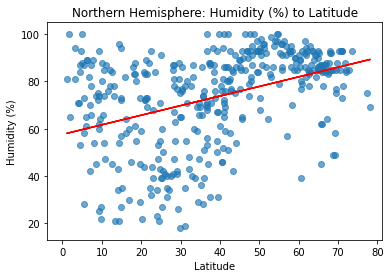

In [134]:
## Linear Regression model between Humidity and Latitude

nh_humid = northern_result.iloc[:,5]
nh_lat = northern_result.iloc[:,2]

nh_slope, nh_int, nh_r, nh_p, nh_std_err = st.linregress(nh_lat, nh_humid)

# linear regression
nh_fit = nh_slope * nh_lat + nh_int

x_values = northern_result["Lat"]
y_values = northern_result["Humidity"]

### # Plot the linear model 
plt.scatter(nh_lat,nh_humid, alpha=.65)
plt.plot(nh_lat,nh_fit,'r-')
plt.xlim(min(nh_lat)-5,max(nh_lat)+3)
plt.ylim(min(nh_humid)-5,max(nh_humid)+5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: Humidity (%) to Latitude')
plt.show()

In [135]:
#This plot looks at a sample of randomly selected cities in the Northern Hemisphere, 
#comparing the cities latitude with the reported humidity % as recorded on a particular day (10th January 2021).
##    There is more likeihood of higher humidity the further away from zero latitude a city is
##    However I note the following tendancies:
##       Most cities reported humdity above 40%
##      The higher latitude of a city, the higher the reported humdity in general

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

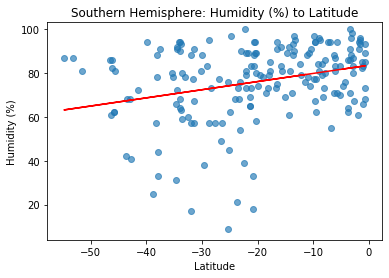

In [136]:
## Linear Regression model between Max Temp and Latitude

sh_humid = southern_result.iloc[:,5]
sh_lat = southern_result.iloc[:,2]

sh_slope, sh_int, sh_r, sh_p, sh_std_err = st.linregress(sh_lat, sh_humid)

# linear regression
sh_fit = sh_slope * sh_lat + sh_int

x_values = southern_result["Lat"]
y_values = southern_result["Humidity"]

### # Plot the linear model 
plt.scatter(sh_lat,sh_humid, alpha=.65)
plt.plot(sh_lat,sh_fit,'r-')
plt.xlim(min(sh_lat)-3,max(sh_lat)+3)
plt.ylim(min(sh_humid)-5,max(sh_humid)+3)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Humidity (%) to Latitude')
plt.show()

In [137]:
#This plot looks at a sample of randomly selected cities in the Southern Hemisphere, 
#comparing the cities latitude with the reported humidity % as recorded on a particular day (10th January 2021).
##   There is a relationship between the latitude of a city and the humidity, but it is not strong
##   however I note the following tendancies:
##       Most cities reported humdity above 40%
##       The closer a city to a latitude of zero, the higher the reported humdity in general

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

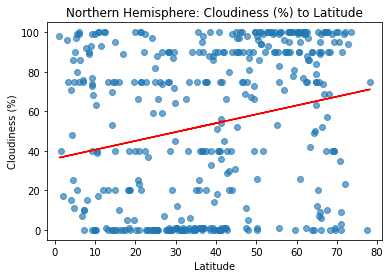

In [138]:
## Linear Regression model between Cloudiness and Latitude

nh_cloud = northern_result.iloc[:,6]
nh_lat = northern_result.iloc[:,2]

nh_slope, nh_int, nh_r, nh_p, nh_std_err = st.linregress(nh_lat, nh_cloud)

# linear regression
nh_fit = nh_slope * nh_lat + nh_int

x_values = northern_result["Lat"]
y_values = northern_result["Cloudiness"]

### # Plot the linear model 
plt.scatter(nh_lat,nh_cloud, alpha=.65)
plt.plot(nh_lat,nh_fit,'r-')
plt.xlim(min(nh_lat)-3,max(nh_lat)+3)
plt.ylim(min(nh_cloud)-5,max(nh_cloud)+5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere: Cloudiness (%) to Latitude')
plt.show()

In [139]:
#This plot looks at a sample of randomly selected cities in the Northern Hemisphere, 
#comparing the cities latitude with the cloudiness % as recorded on a particular day (10th January 2021):
##  The higher the latitude, the increasing level of cloudiness %
##  There is no direct relationship between the latitude and the percentage of cloudiness a single city may experience
##     cities tend to be at either end of the extremes in terms of cloudiness % (below 10% or above 80%)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

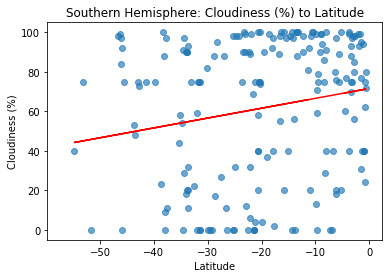

In [140]:
## Linear Regression model between Cloudiness and Latitude

sh_cloud = southern_result.iloc[:,6]
sh_lat = southern_result.iloc[:,2]

sh_slope, sh_int, sh_r, sh_p, sh_std_err = st.linregress(sh_lat, sh_cloud)

# linear regression
sh_fit = sh_slope * sh_lat + sh_int

x_values = southern_result["Lat"]
y_values = southern_result["Cloudiness"]

### # Plot the linear model 
plt.scatter(sh_lat,sh_cloud, alpha=.65)
plt.plot(sh_lat,sh_fit,'r-')
plt.xlim(min(sh_lat)-5,max(sh_lat)+3)
plt.ylim(min(sh_cloud)-5,max(sh_cloud)+5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere: Cloudiness (%) to Latitude')
plt.show()

In [141]:
#This plot looks at a sample of randomly selected cities in the Southern Hemisphere, 
#comparing the cities latitude with the cloudiness % as recorded on a particular day (10th January 2021):
##  The closer the latitude to zero, the increasing level of cloudiness %
##  There is no direct relationship between the latitude and the percentage of cloudiness a single city may experience


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

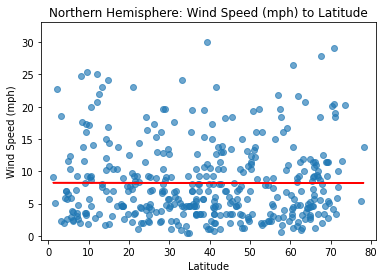

In [142]:
## Linear Regression model between Windspeed and Latitude

nh_wind = northern_result.iloc[:,7]
nh_lat = northern_result.iloc[:,2]

nh_slope, nh_int, nh_r, nh_p, nh_std_err = st.linregress(nh_lat, nh_wind)

# linear regression
nh_fit = nh_slope * nh_lat + nh_int

x_values = northern_result["Lat"]
y_values = northern_result["Wind speed"]

### # Plot the linear model 
plt.scatter(nh_lat,nh_wind, alpha=.65)
plt.plot(nh_lat,nh_fit,'r-')
plt.xlim(min(nh_lat)-3,max(nh_lat)+3)
plt.ylim(min(nh_wind)-1,max(nh_wind)+3)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere: Wind Speed (mph) to Latitude')
plt.show()

In [143]:
#This plot looks at a sample of randomly selected cities in the Northern Hemisphere. 
#comparing the cities latitude with the windspeed on a particular day (10th January 2021):
##     Latitude alone does not necessarily predict the windspeeed in a city
##     Running this numbers of times over a week, any variance in windspeed across the 
##     ... data set was always marginally
##     ... on occasion there were outliers when running this across a week
##     The majority of cities recorded a wind speed of 10mph or less

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

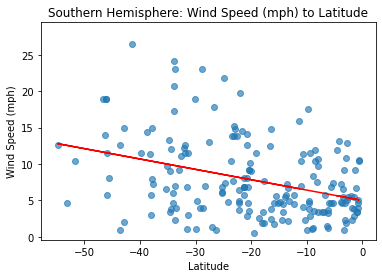

In [144]:
## Linear Regression model between Windspeed and Latitude

sh_wind = southern_result.iloc[:,7]
sh_lat = southern_result.iloc[:,2]

sh_slope, sh_int, sh_r, sh_p, sh_std_err = st.linregress(sh_lat, sh_wind)

# linear regression
sh_fit = sh_slope * sh_lat + sh_int

x_values = southern_result["Lat"]
y_values = southern_result["Wind speed"]

### # Plot the linear model 
plt.scatter(sh_lat,sh_wind, alpha=.65)
plt.plot(sh_lat,sh_fit,'r-')
plt.xlim(min(sh_lat)-3,max(sh_lat)+3)
plt.ylim(min(sh_wind)-1,max(sh_wind)+3)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere: Wind Speed (mph) to Latitude')
plt.show()

In [145]:
#This plot looks at a sample of randomly selected cities in the Southern Hemisphere. 
#comparing the cities latitude with the windspeed on a particular day (10th January 2021):
##     Latitude alone does not necessarily predict the windspeeed in a city
##     Although the wind speed does decrease in general as the latitude gets closer to zero
##     the majority of cities recorded a wind speed of 15mph or less